In [9]:
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import astropy.units as u
from astropy.table import Table
from astropy import constants as const

!pip install synphot
from synphot import units, config
from synphot import SourceSpectrum,SpectralElement,Observation,ExtinctionModel1D
from synphot.models import BlackBodyNorm1D
from synphot.spectrum import BaseUnitlessSpectrum
# from synphot.reddening import ExtinctionCurve
# from astroquery.simbad import Simbad
# from astroquery.mast import Observations
import astropy.visualization
from astropy.visualization import quantity_support
from synphot.blackbody import BlackBody1D
from synphot.units import FLAM

# Working from: https://learn.astropy.org/rst-tutorials/color-excess.html?highlight=filtertutorials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Teaching/Resources/MyDemos')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


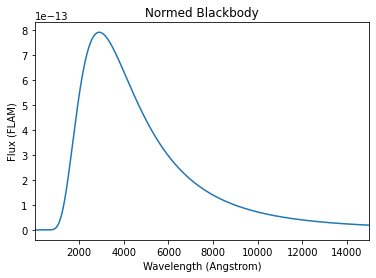

In [11]:
# First, create a blackbody at some temperature.
sp = SourceSpectrum(BlackBodyNorm1D, temperature=10000)
# sp.plot(left=1, right=15000, flux_unit='flam', title='Blackbody')

# Get the Vega spectrum as the zero point flux.
vega = SourceSpectrum.from_vega()
# vega.plot(left=1, right=15000)

# Normalize the blackbody to some chosen magnitude, say V = 10.
vmag = 10.
v_band = SpectralElement.from_filter('johnson_v')
sp_norm = sp.normalize(vmag * units.VEGAMAG, v_band, vegaspec=vega)
sp_norm.plot(left=1, right=15000, flux_unit='flam', title='Normed Blackbody')

In [12]:
def add_rainbow(ax,ylims):
    def rect(x,y,w,h,c):
        ax = plt.gca()
        polygon = plt.Rectangle((x,y),w,h,color=c,alpha=0.25)
        ax.add_patch(polygon)

    def rainbow_fill(X,Y, cmap=plt.get_cmap("jet")):
        plt.plot(X,Y,lw=0)  # Plot so the axes scale correctly

        dx = X[1]-X[0]
        N  = float(X.size)

        for n, (x,y) in enumerate(zip(X,Y)):
            color = cmap(n/N)
            rect(x,0,dx,y,color)

    xarr = np.linspace(380,750,50)
    yarr = np.ones_like(xarr)*ylims[1]
    rainbow_fill(xarr,yarr)
    
    ax.set_ylim(0,ylims[1])


In [13]:
def plot_blank_blackbody(temperature,wavmin=100,wavmax=5000,
                         ls="-",ax=None,bolometric_flux=None):
    # First, create a blackbody at some temperature.
    if bolometric_flux is None:
        bb = BlackBody1D(temperature=temperature)
    else:
        bb = BlackBody1D(temperature=temperature,bolometric_flux=bolometric_flux)
    wav = np.arange(wavmin,wavmax) * u.nm
    flux = bb(wav).to(FLAM, u.spectral_density(wav))
    if ax is None:
        with quantity_support():
            plt.figure()
            plt.plot(wav, flux,color="k",lw=2,ls=ls)
            ax = plt.gca()
    else:
        ax = ax
        with quantity_support():
            plt.plot(wav, flux,color="k",lw=2,ls=ls)
    
    ax.set_xlim(wavmin,wavmax)
    ax.tick_params(labelsize=12,labelleft=False,labelright=False)
    ax.set_xlabel("Wavelength (nm)",fontsize=14)
    ax.set_ylabel("Brightness (arbitrary units)",fontsize=14)
    # https://stackoverflow.com/questions/18215276/how-to-fill-rainbow-color-under-a-curve-in-python-matplotlib
    
    return ax

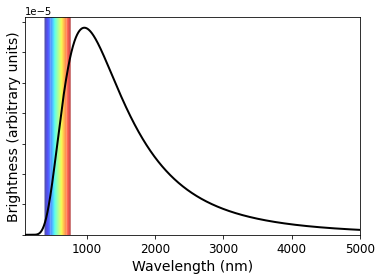

In [14]:
ax = plot_blank_blackbody(temperature=3000*u.K)
ylims = ax.get_ylim()
add_rainbow(ax,ylims)

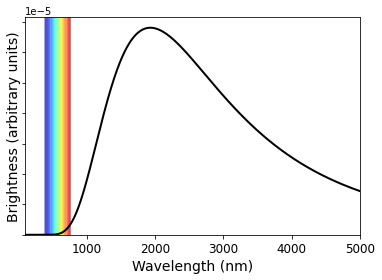

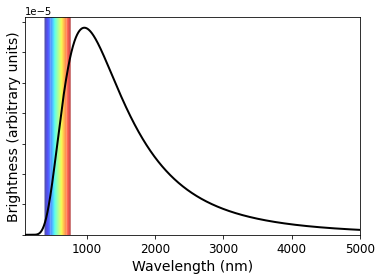

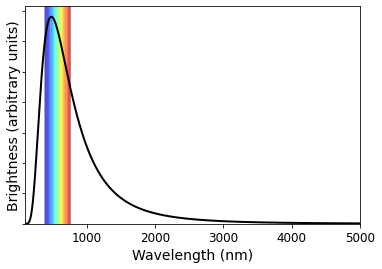

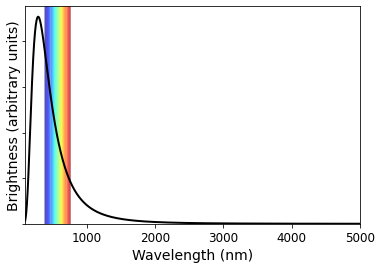

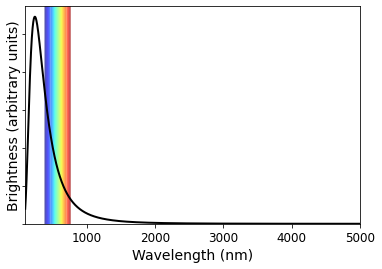

In [15]:
temps = np.array([1500,3000,6000,10000,12000])*u.K
for temp in temps:
    ax = plot_blank_blackbody(temp)
    ylims = ax.get_ylim()
    add_rainbow(ax,ylims)
    plt.savefig(f"figures/BB_{temp.value}.png",transparent=False)
    

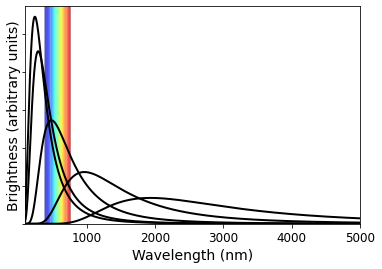

In [16]:
temps = np.array([1500,3000,6000,10000,12000])*u.K
flux = const.sigma_sb * temps**4
for temp in temps:
    if temp.value==1500:
        ax = plot_blank_blackbody(temp)
    else:
        ax = plot_blank_blackbody(temp,ax=ax)
    
    
ylims = ax.get_ylim()
add_rainbow(ax,ylims)

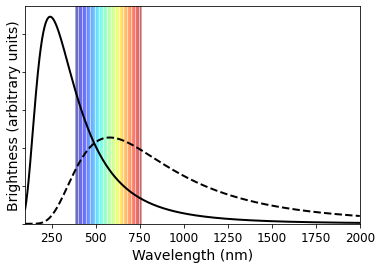

In [17]:
temps = np.array([5000,12000])*u.K
styles = np.array(["--","-"])
for i in range(len(temps)):
    temp, ls = temps[i],styles[i]
    if i==0:
        ax = plot_blank_blackbody(temp,ls=ls,wavmax=2000)
    else:
        ax = plot_blank_blackbody(temp,ax=ax,ls=ls,wavmax=2000)
    
    
ylims = ax.get_ylim()
add_rainbow(ax,ylims)
plt.savefig("figures/BB_compare0.png",transparent=False)

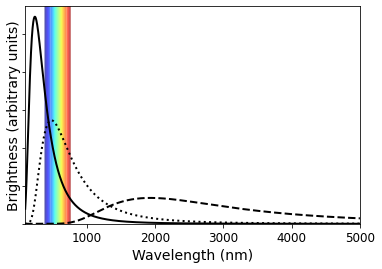

In [18]:
temps = np.array([1500,6000,12000])*u.K
styles = np.array(["--",":","-"])
for i in range(len(temps)):
    temp, ls = temps[i],styles[i]
    if temp.value==1500:
        ax = plot_blank_blackbody(temp,ls=ls)
    else:
        ax = plot_blank_blackbody(temp,ax=ax,ls=ls)
    
    
ylims = ax.get_ylim()
add_rainbow(ax,ylims)
plt.savefig("figures/BB_compare1.png",transparent=False)

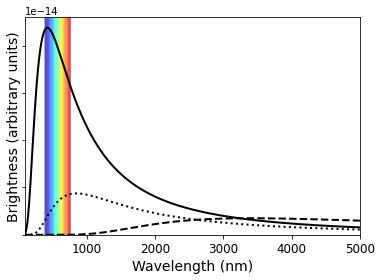

In [19]:
# TODO: figure out how to pass in fluxes properly
temps = np.array([1500,6000,12000])*u.K
fluxes = np.array([1,10,100])*FLAM*u.Hz
styles = np.array(["--",":","-"])
for i in range(len(temps)):
    temp, flux, ls = temps[i],fluxes[i],styles[i]
    if temp.value==1500:
        ax = plot_blank_blackbody(temp,bolometric_flux=flux,ls=ls)
    else:
        ax = plot_blank_blackbody(temp,bolometric_flux=flux,ax=ax,ls=ls)
    
    
ylims = ax.get_ylim()
add_rainbow(ax,ylims)
plt.savefig("figures/BB_compare2.png",transparent=False)

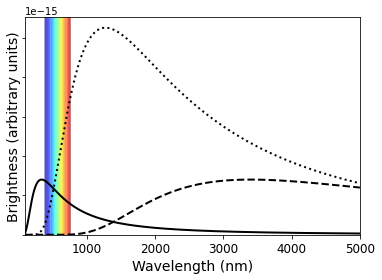

In [20]:
# TODO: figure out how to pass in fluxes properly
temps = np.array([1500,4000,15000])*u.K
fluxes = np.array([0.1,1,1])*FLAM*u.Hz
styles = np.array(["--",":","-"])
for i in range(len(temps)):
    temp, flux, ls = temps[i],fluxes[i],styles[i]
    if temp.value==1500:
        ax = plot_blank_blackbody(temp,bolometric_flux=flux,ls=ls)
    else:
        ax = plot_blank_blackbody(temp,bolometric_flux=flux,ax=ax,ls=ls)
    
    
ylims = ax.get_ylim()
add_rainbow(ax,ylims)
plt.savefig("figures/BB_compare3.png",transparent=False)

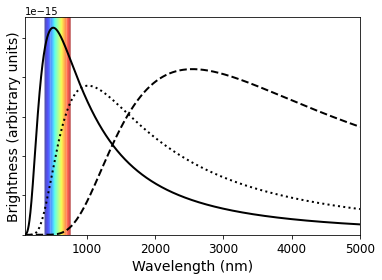

In [21]:
# TODO: figure out how to pass in fluxes properly
temps = np.array([2000,5000,10000])*u.K
fluxes = np.array([0.4,0.9,2.5])*FLAM*u.Hz
styles = np.array(["--",":","-"])
for i in range(len(temps)):
    temp, flux, ls = temps[i],fluxes[i],styles[i]
    if i==0:
        ax = plot_blank_blackbody(temp,bolometric_flux=flux,ls=ls)
    else:
        ax = plot_blank_blackbody(temp,bolometric_flux=flux,ax=ax,ls=ls)
    
    
add_rainbow(ax,ylims)
plt.savefig("figures/BB_compare4.png",transparent=False)